In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"?

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***.

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$).

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [3]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations
# of this multinomial random variable, and note it's relationship to `n`

array([1, 8, 0, 1])

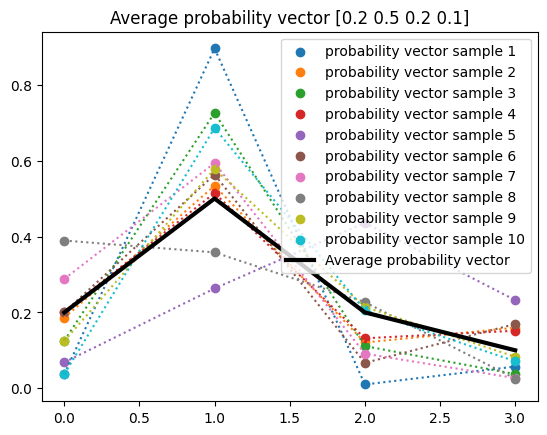

In [4]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector");
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Answer: Recall that $\mathbf{x}^{(t)}=(x_1^t,...,x_k^t)$ represents the number of k chip brand purchases from store open to some time $t$. So, as $t$ increases, the componeent $x_i^t$ in general increases for all $i = 1,...,k$

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


Answer: <br>
Notice
\begin{align*}
  p(\mathbf{p}|\mathbf{x}^{t}) &\propto \prod_{j=1}^k p_j^{\alpha_j - 1}\cdot p_{1}^{x_{1}}\cdots p_{k}^{x_{k}} \\
  &=\prod_{j=1}^{k}p_j^{\alpha_j+x_j-1}
\end{align*}
This shows that $\mathbf{p}|\mathbf{x}^{t} \sim Dirichlet(\mathbf{\alpha^*})$, where $\mathbf{\alpha^*} = (\alpha_1+x_1,...,\alpha_k+x_k)$

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$.

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each.

In [13]:
n = 100
alpha = [1,1,1,1]
new_alpha = np.add(alpha, [2,5,2,1])
sample = np.random.dirichlet(new_alpha, size=n)
j=1
sample[:,j]
#np.array([[2,5,2,1]])[0,j] # replace this with coding sampling from p_j|x

array([0.61914777, 0.37715073, 0.50708157, 0.55303282, 0.45187087,
       0.55451217, 0.40283632, 0.44883842, 0.27146132, 0.34884532,
       0.54468072, 0.62755648, 0.47403699, 0.30571769, 0.33366175,
       0.24544683, 0.28284778, 0.53172417, 0.41241417, 0.3468486 ,
       0.4215514 , 0.57589789, 0.20484143, 0.41662086, 0.38577021,
       0.6359208 , 0.56194828, 0.45134835, 0.32780157, 0.46204397,
       0.43659918, 0.56978107, 0.41749548, 0.45877463, 0.49844782,
       0.43431036, 0.1978963 , 0.66898102, 0.51895034, 0.57121681,
       0.33116652, 0.37515552, 0.26695974, 0.59372817, 0.44753998,
       0.3334369 , 0.30718671, 0.52724883, 0.39910204, 0.61577642,
       0.58526021, 0.59046391, 0.53173966, 0.41433366, 0.34475899,
       0.28702323, 0.75487113, 0.55130913, 0.42654599, 0.30451063,
       0.67666823, 0.32455911, 0.26465457, 0.24030839, 0.35793049,
       0.25192873, 0.2123461 , 0.23198425, 0.47823304, 0.54690751,
       0.34775441, 0.53091979, 0.44577947, 0.43490278, 0.43810

In [14]:
len(sample[:,1])

100

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [15]:
# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`
q = 0.5
current_sample = np.random.dirichlet(new_alpha, size=100000)[:,j]
(current_sample < q).mean()


0.7089

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$.


In [16]:
# I generate the empirical 95% credible interval

interval_sample = np.random.dirichlet(new_alpha, size=100000)[:,j]
quantiles = np.percentile(interval_sample, [25,75])
quantiles

array([0.3363034 , 0.51670642])

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [17]:
j_2 = 2
estimate_sample = np.random.dirichlet(new_alpha, size=100000)
j_1_sample = estimate_sample[:, j]
j_2_sample = estimate_sample[:, j_2]
(j_1_sample > j_2_sample).mean()

0.85528

7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


The 95% CI is:
[1.30643351 3.53230208]


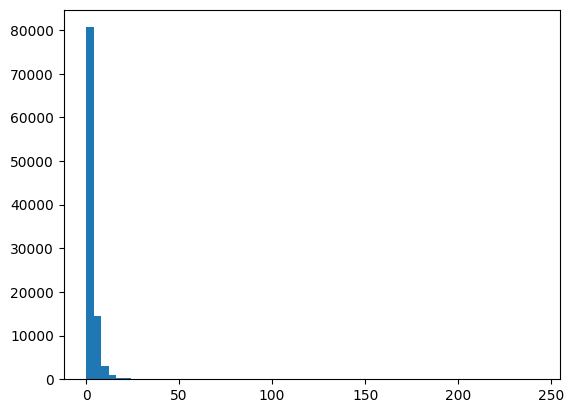

In [23]:
# I will use the same simulate sample from Q6

# plot the histogram to show the empirical distribution of p_j/p_j'
plt.hist(j_1_sample/j_2_sample, bins = 60);

# Generate 95% Empirical Credible Interval
quantiles = np.percentile(j_1_sample/j_2_sample, [25,75])
print('The 95% CI is:')
print(quantiles)

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$.

The 95% CI is:
[0.08099852 0.3542584 ]


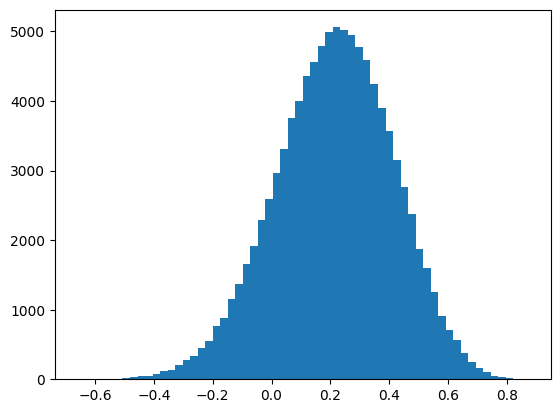

In [24]:
# I will use the same sample from Q6
# plot the histogram to show the empirical distribution of p_j/p_j'
plt.hist(j_1_sample-j_2_sample, bins = 60);

# Generate 95% Empirical Credible Interval
quantiles = np.percentile(j_1_sample-j_2_sample, [25,75])
print('The 95% CI is:')
print(quantiles)

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


It can help us to infer the relationship between $p_j$ and $p_j'$ to check whether our model make sense. In particular, along with the time $t$ increaes, we observe more information on the sales of k-chip brands. In this case, we should expect to see a relative big proabibility mass around 2 for the distribution of the ratio $\frac{p_j}{p_j'}$ for $(j,j') = (2,3)$ and $(4,5)$ repsetively. Conversely, we should a big probability mass around 0.2 and 0.001 for the distribution of the absolute ratio.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


Answer: as $t$ increases, $\frac{p_4}{p_4}$ will converge to $2$ in probability, and $p_4-p_5$ will converge to 0.001 in probability